In [6]:
import numpy as np
import librosa
from scipy.signal import fftconvolve
from IPython.display import Audio
import matplotlib.pyplot as plt
from dataset import SpeechDataset

# Example `.wav` file

In [2]:
audio_file = "train\\audio\\bed\\0a7c2a8d_nohash_0.wav"
audio, sample_rate = librosa.load(audio_file)

In [28]:
Audio(data=audio, rate=sample_rate)

In [7]:
labels_path = "train\\testing_list.txt"

# Random sample

In [5]:
speech_data = SpeechDataset(data_dir="train\\audio", labels=LABELS, labels_path='train\\testing_list.txt')
speech_data.listen_to_random_sample(3)

Label: left


Label: unknown


Label: unknown


## Cepstrum of signal

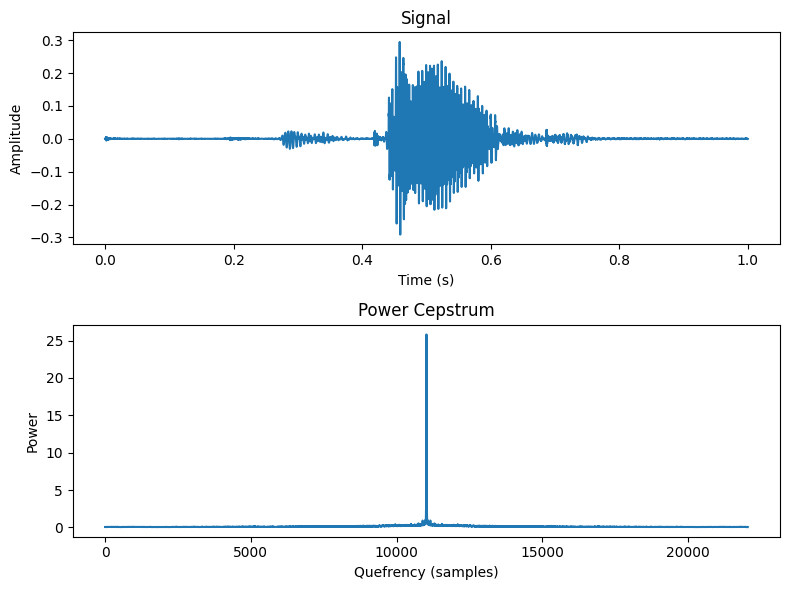

In [29]:
# Generate a test signal
t = np.linspace(0, 1, sample_rate)
signal = audio

# Compute the power cepstrum
spectrum = np.abs(np.fft.fft(signal))
log_spectrum = np.log(spectrum)
cepstrum = np.abs(np.fft.ifft(log_spectrum))
power_cepstrum = np.abs(fftconvolve(cepstrum, cepstrum[::-1], mode='same'))

# Plot the signal and its cepstrum
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(t, signal)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signal')

axs[1].plot(power_cepstrum)
axs[1].set_xlabel('Quefrency (samples)')
axs[1].set_ylabel('Power')
axs[1].set_title('Power Cepstrum')

plt.tight_layout()
plt.show()


# MEL spectrogram

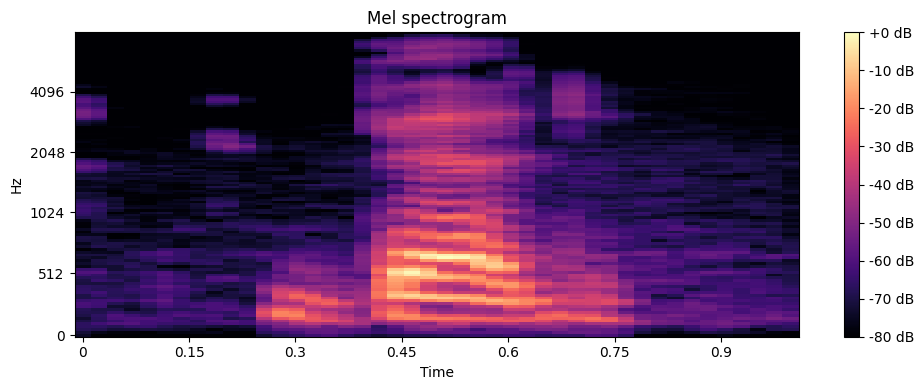

In [25]:
S = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=128, fmax=8000)

# Convert power to dB scale
S_db = librosa.power_to_db(S, ref=np.max)

# Plot Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sample_rate, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

# MFCC (Mel frequency Cepstral Coefficients)

In [12]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

print(mfccs.shape)
print(sample_rate)


(13, 44)
22050


1. 13 MFCC coefficients
2. 44 frames, each frame 2048 samples long.
3. 75% frames overlap

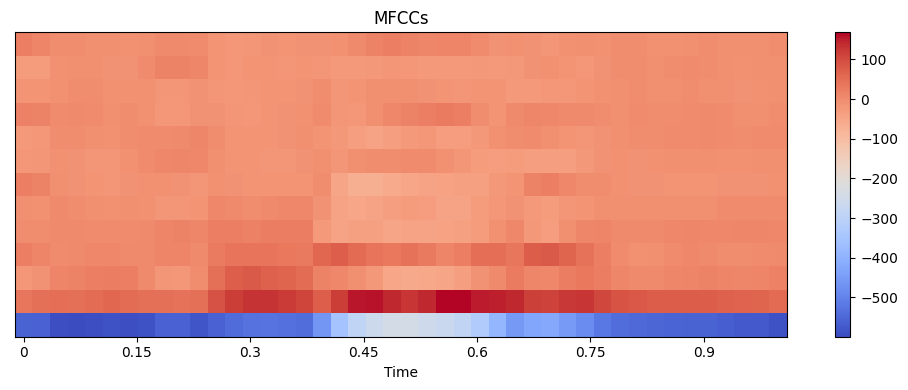

In [26]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

# Delta and delta-delta coefficients

In [17]:
# Compute delta and delta-delta coefficients
delta = librosa.feature.delta(mfccs)
delta_delta = librosa.feature.delta(mfccs, order=2)

print(delta.shape)
print(delta_delta.shape) 


(13, 44)
(13, 44)


## Concatenate results

In [21]:
obs = np.concatenate([mfccs, delta, delta_delta], axis=0)
obs.shape

(39, 44)